## MANISH KUMAR
## D19018

#### Objective:-1. Build a Feed Forward Network for MNIST Classification in Pytorch in not more than 10 epochs.
* Number of parameters used in the model ( lower the better)
* Validation data accuracy (higher the better)
* Experimentation details to reach at the final set of parameters used in the model.

In [1]:
## import neccessaery libraries
import os
from pathlib import Path
import torch
from torch.utils.data import TensorDataset ,DataLoader
from torch import nn,optim
import torch.nn.functional as F
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
# Load dataset
os.chdir("C:\\Users\\MANDY\\Desktop\\dataset")
train=pd.read_csv("MNISTDATASET.csv")
test=pd.read_csv("MNIST_TEST.csv")

In [3]:
# get the shape of loaded dataset
x=train.drop("label",axis=1)
y=np.array(train['label'])
x.shape,y.shape

((42000, 784), (42000,))

In [4]:
torch_X_train = torch.from_numpy(x.values).type(torch.FloatTensor)/255
torch_y_train = torch.from_numpy(y).type(torch.LongTensor)
myDataset = torch.utils.data.TensorDataset(torch_X_train,torch_y_train)
valid_no  = int(0.2 * len(myDataset))
# so divide the data into trainset and testset
trainSet,testSet = torch.utils.data.random_split(myDataset,(len(myDataset)-valid_no,valid_no))
print(f"len of trainSet {len(trainSet)} , len of testSet {len(testSet)}")
batch_size=64
train_loader  = DataLoader(trainSet , batch_size=batch_size ,shuffle=True) 
test_loader  = DataLoader(testSet , batch_size=batch_size ,shuffle=True)

len of trainSet 33600 , len of testSet 8400


#### EXPERIMENT 1

In [25]:
# Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 392),
                      nn.ReLU(),
                      nn.Linear(392, 196),
                      nn.ReLU(),
                      nn.Linear(196, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
images, labels = next(iter(train_loader))
images = images.view(images.shape[0], -1)

logits = model(images)
loss = criterion(logits, labels)


print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


### Adagrad optimizer used

In [89]:
from torch import optim
#Adagrad optimizer used
optimizer=optim.Adagrad(model.parameters(),lr=0.1)

In [33]:
epochs=5
train_losses,test_losses=[],[]
for e in range(epochs):
    running_loss=0
    for images,labels in train_loader:
        optimizer.zero_grad()
        log_ps=model(images)
        loss=criterion(log_ps,labels)
        loss.backward()
        optimizer.step()
        running_loss+=loss.item()
        
    else:
        test_loss=0
        accuracy=0
        
        with torch.no_grad():
            model.eval()
            for images,labels in test_loader:
                log_ps=model(images)
                test_loss+=criterion(log_ps,labels)
                ps=torch.exp(log_ps)
                top_p,top_class=ps.topk(1,dim=1)
                equals=top_class==labels.view(*top_class.shape)
                accuracy+=torch.mean(equals.type(torch.FloatTensor))
        model.train()
        train_losses.append(running_loss/len(train_loader))
        test_losses.append(test_loss/len(test_loader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(train_loader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(test_loader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(test_loader)))

Epoch: 1/5..  Training Loss: 0.430..  Test Loss: 0.238..  Test Accuracy: 0.940
Epoch: 2/5..  Training Loss: 0.151..  Test Loss: 0.210..  Test Accuracy: 0.945
Epoch: 3/5..  Training Loss: 0.122..  Test Loss: 0.197..  Test Accuracy: 0.949
Epoch: 4/5..  Training Loss: 0.105..  Test Loss: 0.199..  Test Accuracy: 0.951
Epoch: 5/5..  Training Loss: 0.091..  Test Loss: 0.198..  Test Accuracy: 0.952


In [138]:
print('No. of parameters',sum([p.numel()for p in model.parameters()]))

No. of parameters 386718


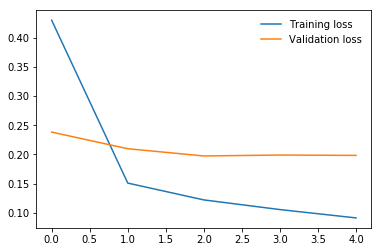

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)
plt.show()

#### Experiment 2

In [66]:
# Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 392),
                      nn.ReLU(),
                      nn.Linear(392, 196),
                      nn.ReLU(),
                      nn.Linear(196, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
images, labels = next(iter(train_loader))
images = images.view(images.shape[0], -1)

logits = model(images)
loss = criterion(logits, labels)


print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


In [67]:
from torch import optim
#Adagrad optimizer used
optimizer=optim.Adagrad(model.parameters(),lr=0.2)

In [68]:
epochs=10
train_losses,test_losses=[],[]
for e in range(epochs):
    running_loss=0
    for images,labels in train_loader:
        optimizer.zero_grad()
        log_ps=model(images)
        loss=criterion(log_ps,labels)
        loss.backward()
        optimizer.step()
        running_loss+=loss.item()
        
    else:
        test_loss=0
        accuracy=0
        
        with torch.no_grad():
            model.eval()
            for images,labels in test_loader:
                log_ps=model(images)
                test_loss+=criterion(log_ps,labels)
                ps=torch.exp(log_ps)
                top_p,top_class=ps.topk(1,dim=1)
                equals=top_class==labels.view(*top_class.shape)
                accuracy+=torch.mean(equals.type(torch.FloatTensor))
        model.train()
        train_losses.append(running_loss/len(train_loader))
        test_losses.append(test_loss/len(test_loader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(train_loader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(test_loader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(test_loader)))

Epoch: 1/10..  Training Loss: 5.779..  Test Loss: 0.340..  Test Accuracy: 0.907
Epoch: 2/10..  Training Loss: 0.285..  Test Loss: 0.311..  Test Accuracy: 0.914
Epoch: 3/10..  Training Loss: 0.215..  Test Loss: 0.218..  Test Accuracy: 0.937
Epoch: 4/10..  Training Loss: 0.176..  Test Loss: 0.230..  Test Accuracy: 0.934
Epoch: 5/10..  Training Loss: 0.150..  Test Loss: 0.204..  Test Accuracy: 0.945
Epoch: 6/10..  Training Loss: 0.133..  Test Loss: 0.216..  Test Accuracy: 0.942
Epoch: 7/10..  Training Loss: 0.119..  Test Loss: 0.215..  Test Accuracy: 0.942
Epoch: 8/10..  Training Loss: 0.105..  Test Loss: 0.219..  Test Accuracy: 0.941
Epoch: 9/10..  Training Loss: 0.098..  Test Loss: 0.206..  Test Accuracy: 0.946
Epoch: 10/10..  Training Loss: 0.088..  Test Loss: 0.202..  Test Accuracy: 0.949


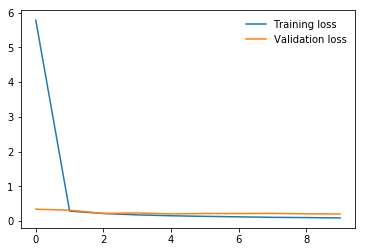

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)
plt.show()

#### Experiment 3

In [93]:
# Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 392),
                      nn.ReLU(),
                      nn.Linear(392, 196),
                      nn.ReLU(),
                      nn.Linear(196, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
images, labels = next(iter(train_loader))
images = images.view(images.shape[0], -1)

logits = model(images)
loss = criterion(logits, labels)


print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


### SGD optimizer used

In [94]:
from torch import optim
#SGD optimizer used
optimizer=optim.SGD(model.parameters(),lr=0.2,momentum=0.9)

### epochs =5

In [95]:
epochs=5
train_losses,test_losses=[],[]
for e in range(epochs):
    running_loss=0
    for images,labels in train_loader:
        optimizer.zero_grad()
        log_ps=model(images)
        loss=criterion(log_ps,labels)
        loss.backward()
        optimizer.step()
        running_loss+=loss.item()
        
    else:
        test_loss=0
        accuracy=0
        
        with torch.no_grad():
            model.eval()
            for images,labels in test_loader:
                log_ps=model(images)
                test_loss+=criterion(log_ps,labels)
                ps=torch.exp(log_ps)
                top_p,top_class=ps.topk(1,dim=1)
                equals=top_class==labels.view(*top_class.shape)
                accuracy+=torch.mean(equals.type(torch.FloatTensor))
        model.train()
        train_losses.append(running_loss/len(train_loader))
        test_losses.append(test_loss/len(test_loader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(train_loader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(test_loader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(test_loader)))

Epoch: 1/5..  Training Loss: 0.415..  Test Loss: 0.349..  Test Accuracy: 0.910
Epoch: 2/5..  Training Loss: 0.218..  Test Loss: 0.163..  Test Accuracy: 0.954
Epoch: 3/5..  Training Loss: 0.163..  Test Loss: 0.212..  Test Accuracy: 0.943
Epoch: 4/5..  Training Loss: 0.143..  Test Loss: 0.195..  Test Accuracy: 0.952
Epoch: 5/5..  Training Loss: 0.133..  Test Loss: 0.227..  Test Accuracy: 0.946


In [139]:
print('No. of parameters',sum([p.numel()for p in model.parameters()]))

No. of parameters 386718


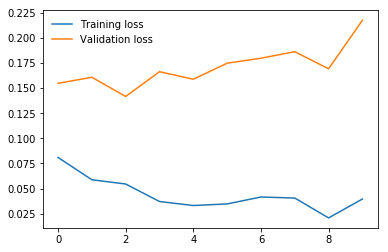

In [98]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)
plt.show()

#### Experiment 4

In [62]:
# Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 392),
                      nn.ReLU(),
                      nn.Linear(392, 196),
                      nn.ReLU(),
                      nn.Linear(196, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
images, labels = next(iter(train_loader))
images = images.view(images.shape[0], -1)

logits = model(images)
loss = criterion(logits, labels)


print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


In [96]:
from torch import optim
#SGD optimizer used
optimizer=optim.SGD(model.parameters(),lr=0.3,momentum=0.8)

### epochs = 10

In [97]:
epochs=10
train_losses,test_losses=[],[]
for e in range(epochs):
    running_loss=0
    for images,labels in train_loader:
        optimizer.zero_grad()
        log_ps=model(images)
        loss=criterion(log_ps,labels)
        loss.backward()
        optimizer.step()
        running_loss+=loss.item()
        
    else:
        test_loss=0
        accuracy=0
        
        with torch.no_grad():
            model.eval()
            for images,labels in test_loader:
                log_ps=model(images)
                test_loss+=criterion(log_ps,labels)
                ps=torch.exp(log_ps)
                top_p,top_class=ps.topk(1,dim=1)
                equals=top_class==labels.view(*top_class.shape)
                accuracy+=torch.mean(equals.type(torch.FloatTensor))
        model.train()
        train_losses.append(running_loss/len(train_loader))
        test_losses.append(test_loss/len(test_loader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(train_loader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(test_loader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(test_loader)))

Epoch: 1/10..  Training Loss: 0.081..  Test Loss: 0.155..  Test Accuracy: 0.968
Epoch: 2/10..  Training Loss: 0.059..  Test Loss: 0.161..  Test Accuracy: 0.967
Epoch: 3/10..  Training Loss: 0.055..  Test Loss: 0.142..  Test Accuracy: 0.970
Epoch: 4/10..  Training Loss: 0.037..  Test Loss: 0.166..  Test Accuracy: 0.970
Epoch: 5/10..  Training Loss: 0.033..  Test Loss: 0.159..  Test Accuracy: 0.971
Epoch: 6/10..  Training Loss: 0.035..  Test Loss: 0.175..  Test Accuracy: 0.972
Epoch: 7/10..  Training Loss: 0.042..  Test Loss: 0.180..  Test Accuracy: 0.968
Epoch: 8/10..  Training Loss: 0.041..  Test Loss: 0.186..  Test Accuracy: 0.968
Epoch: 9/10..  Training Loss: 0.021..  Test Loss: 0.169..  Test Accuracy: 0.974
Epoch: 10/10..  Training Loss: 0.040..  Test Loss: 0.217..  Test Accuracy: 0.963


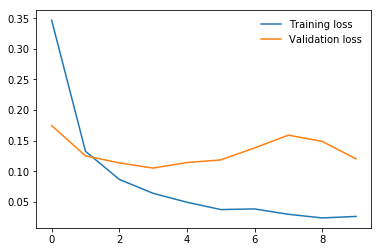

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)
plt.show()

#### Experiminent 8

In [ ]:
# Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 392),
                      nn.ReLU(),
                      nn.Linear(392, 196),
                      nn.ReLU(),
                      nn.Linear(196, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
images, labels = next(iter(train_loader))
images = images.view(images.shape[0], -1)

logits = model(images)
loss = criterion(logits, labels)


print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

In [99]:
from torch import optim
#SGD optimizer used
optimizer=optim.SGD(model.parameters(),lr=0.3,momentum=0.8,nesterov=True)

In [100]:
epochs=10
train_losses,test_losses=[],[]
for e in range(epochs):
    running_loss=0
    for images,labels in train_loader:
        optimizer.zero_grad()
        log_ps=model(images)
        loss=criterion(log_ps,labels)
        loss.backward()
        optimizer.step()
        running_loss+=loss.item()
        
    else:
        test_loss=0
        accuracy=0
        
        with torch.no_grad():
            model.eval()
            for images,labels in test_loader:
                log_ps=model(images)
                test_loss+=criterion(log_ps,labels)
                ps=torch.exp(log_ps)
                top_p,top_class=ps.topk(1,dim=1)
                equals=top_class==labels.view(*top_class.shape)
                accuracy+=torch.mean(equals.type(torch.FloatTensor))
        model.train()
        train_losses.append(running_loss/len(train_loader))
        test_losses.append(test_loss/len(test_loader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(train_loader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(test_loader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(test_loader)))

Epoch: 1/10..  Training Loss: 0.039..  Test Loss: 0.211..  Test Accuracy: 0.968
Epoch: 2/10..  Training Loss: 0.030..  Test Loss: 0.236..  Test Accuracy: 0.970
Epoch: 3/10..  Training Loss: 0.040..  Test Loss: 0.231..  Test Accuracy: 0.967
Epoch: 4/10..  Training Loss: 0.040..  Test Loss: 0.219..  Test Accuracy: 0.969
Epoch: 5/10..  Training Loss: 0.050..  Test Loss: 0.205..  Test Accuracy: 0.969
Epoch: 6/10..  Training Loss: 0.041..  Test Loss: 0.206..  Test Accuracy: 0.971
Epoch: 7/10..  Training Loss: 0.032..  Test Loss: 0.273..  Test Accuracy: 0.962
Epoch: 8/10..  Training Loss: 0.031..  Test Loss: 0.257..  Test Accuracy: 0.969
Epoch: 9/10..  Training Loss: 0.035..  Test Loss: 0.266..  Test Accuracy: 0.971
Epoch: 10/10..  Training Loss: 0.027..  Test Loss: 0.217..  Test Accuracy: 0.973


#### Experiment 5

In [103]:
# Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 350),
                      nn.ReLU(),
                      nn.Linear(350, 170),
                      nn.ReLU(),
                      nn.Linear(170, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
images, labels = next(iter(train_loader))
images = images.view(images.shape[0], -1)

logits = model(images)
loss = criterion(logits, labels)


print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


### Adam optimizer used

In [132]:
from torch import optim
#Adam optimizer used
optimizer=optim.Adam(model.parameters(),lr=0.1, betas=(0.1, 0.95),
    eps=1e-08,
    weight_decay=0,
    amsgrad=False)

In [133]:
epochs=5
train_losses,test_losses=[],[]
for e in range(epochs):
    running_loss=0
    for images,labels in train_loader:
        optimizer.zero_grad()
        log_ps=model(images)
        loss=criterion(log_ps,labels)
        loss.backward()
        optimizer.step()
        running_loss+=loss.item()
        
    else:
        test_loss=0
        accuracy=0
        
        with torch.no_grad():
            model.eval()
            for images,labels in test_loader:
                log_ps=model(images)
                test_loss+=criterion(log_ps,labels)
                ps=torch.exp(log_ps)
                top_p,top_class=ps.topk(1,dim=1)
                equals=top_class==labels.view(*top_class.shape)
                accuracy+=torch.mean(equals.type(torch.FloatTensor))
        model.train()
        train_losses.append(running_loss/len(train_loader))
        test_losses.append(test_loss/len(test_loader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(train_loader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(test_loader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(test_loader)))

Epoch: 1/5..  Training Loss: 123005726844365600.000..  Test Loss: 146074809854328832.000..  Test Accuracy: 0.913
Epoch: 2/5..  Training Loss: 114306772798888752.000..  Test Loss: 137864103694696448.000..  Test Accuracy: 0.918
Epoch: 3/5..  Training Loss: 107213093969935360.000..  Test Loss: 131945329523163136.000..  Test Accuracy: 0.921
Epoch: 4/5..  Training Loss: 101172405990018688.000..  Test Loss: 126621554351013888.000..  Test Accuracy: 0.926
Epoch: 5/5..  Training Loss: 96086345890356272.000..  Test Loss: 120268043589779456.000..  Test Accuracy: 0.929


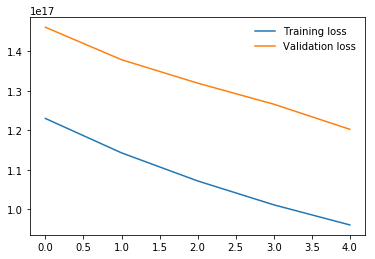

In [134]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)
plt.show()

#### Experiment 6

In [70]:
# Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 392),
                      nn.ReLU(),
                      nn.Linear(392, 196),
                      nn.ReLU(),
                      nn.Linear(196, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
images, labels = next(iter(train_loader))
images = images.view(images.shape[0], -1)

logits = model(images)
loss = criterion(logits, labels)


print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


In [135]:
from torch import optim
#Adam optimizer used
optimizer=optim.Adam(model.parameters(),lr=0.1, betas=(0.1, 0.95),
    eps=1e-08,
    weight_decay=0,
    amsgrad=False)

In [136]:
epochs=10
train_losses,test_losses=[],[]
for e in range(epochs):
    running_loss=0
    for images,labels in train_loader:
        optimizer.zero_grad()
        log_ps=model(images)
        loss=criterion(log_ps,labels)
        loss.backward()
        optimizer.step()
        running_loss+=loss.item()
        
    else:
        test_loss=0
        accuracy=0
        
        with torch.no_grad():
            model.eval()
            for images,labels in test_loader:
                log_ps=model(images)
                test_loss+=criterion(log_ps,labels)
                ps=torch.exp(log_ps)
                top_p,top_class=ps.topk(1,dim=1)
                equals=top_class==labels.view(*top_class.shape)
                accuracy+=torch.mean(equals.type(torch.FloatTensor))
        model.train()
        train_losses.append(running_loss/len(train_loader))
        test_losses.append(test_loss/len(test_loader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(train_loader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(test_loader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(test_loader)))

Epoch: 1/10..  Training Loss: 91787849677427184.000..  Test Loss: 115724509356490752.000..  Test Accuracy: 0.933
Epoch: 2/10..  Training Loss: 88039273178428560.000..  Test Loss: 112726793982574592.000..  Test Accuracy: 0.934
Epoch: 3/10..  Training Loss: 84793023128563744.000..  Test Loss: 109975515242168320.000..  Test Accuracy: 0.935
Epoch: 4/10..  Training Loss: 81961086317632592.000..  Test Loss: 108572899182379008.000..  Test Accuracy: 0.937
Epoch: 5/10..  Training Loss: 79502907819635504.000..  Test Loss: 103984199073005568.000..  Test Accuracy: 0.939
Epoch: 6/10..  Training Loss: 77305119072669072.000..  Test Loss: 101941349418270720.000..  Test Accuracy: 0.939
Epoch: 7/10..  Training Loss: 75348942655604272.000..  Test Loss: 100974260222164992.000..  Test Accuracy: 0.941
Epoch: 8/10..  Training Loss: 73613149845858544.000..  Test Loss: 98425188542054400.000..  Test Accuracy: 0.943
Epoch: 9/10..  Training Loss: 72057556254487064.000..  Test Loss: 96978995744079872.000..  Test A

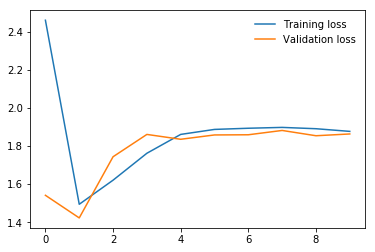

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)
plt.show()

## experiment 7

In [74]:
# Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 392),
                      nn.ReLU(),
                      nn.Linear(392, 196),
                      nn.ReLU(),
                      nn.Linear(196, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
images, labels = next(iter(train_loader))
images = images.view(images.shape[0], -1)

logits = model(images)
loss = criterion(logits, labels)


print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


In [122]:
from torch import optim
#RMSprop optimizer used
optimizer=optim.RMSprop(model.parameters(),lr=0.1,
    alpha=0.99,
    eps=1e-08,
    weight_decay=1,
    momentum=1,
    centered=True,)

In [123]:
epochs=10
train_losses,test_losses=[],[]
for e in range(epochs):
    running_loss=0
    for images,labels in train_loader:
        optimizer.zero_grad()
        log_ps=model(images)
        loss=criterion(log_ps,labels)
        loss.backward()
        optimizer.step()
        running_loss+=loss.item()
        
    else:
        test_loss=0
        accuracy=0
        
        with torch.no_grad():
            model.eval()
            for images,labels in test_loader:
                log_ps=model(images)
                test_loss+=criterion(log_ps,labels)
                ps=torch.exp(log_ps)
                top_p,top_class=ps.topk(1,dim=1)
                equals=top_class==labels.view(*top_class.shape)
                accuracy+=torch.mean(equals.type(torch.FloatTensor))
        model.train()
        train_losses.append(running_loss/len(train_loader))
        test_losses.append(test_loss/len(test_loader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(train_loader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(test_loader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(test_loader)))

Epoch: 1/10..  Training Loss: 623398849734.396..  Test Loss: 2376607727616.000..  Test Accuracy: 0.875
Epoch: 2/10..  Training Loss: 10599445386082.012..  Test Loss: 26368297402368.000..  Test Accuracy: 0.895
Epoch: 3/10..  Training Loss: 40090308063676.711..  Test Loss: 87967683051520.000..  Test Accuracy: 0.915
Epoch: 4/10..  Training Loss: 113964323551938.078..  Test Loss: 229281024180224.000..  Test Accuracy: 0.933
Epoch: 5/10..  Training Loss: 239233104134924.188..  Test Loss: 462619752267776.000..  Test Accuracy: 0.937
Epoch: 6/10..  Training Loss: 505969245267277.562..  Test Loss: 976696165531648.000..  Test Accuracy: 0.926
Epoch: 7/10..  Training Loss: 983569484846515.000..  Test Loss: 1886615253286912.000..  Test Accuracy: 0.947
Epoch: 8/10..  Training Loss: 1637229684238519.250..  Test Loss: 2794602880827392.000..  Test Accuracy: 0.952
Epoch: 9/10..  Training Loss: 2211168911056412.250..  Test Loss: 4641089583579136.000..  Test Accuracy: 0.950
Epoch: 10/10..  Training Loss: 3

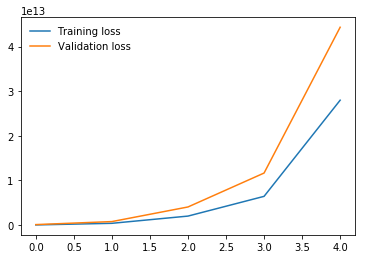

In [127]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)
plt.show()

### experiment 8

In [124]:
# Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 392),
                      nn.ReLU(),
                      nn.Linear(392, 196),
                      nn.ReLU(),
                      nn.Linear(196, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
images, labels = next(iter(train_loader))
images = images.view(images.shape[0], -1)

logits = model(images)
loss = criterion(logits, labels)


print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


In [129]:
from torch import optim
#RMSprop optimizer used
optimizer=optim.RMSprop(model.parameters(),lr=0.5,
    alpha=0.99,
    eps=1e-08,
    weight_decay=1,
    momentum=1,
    centered=True,)

In [130]:
epochs=5
train_losses,test_losses=[],[]
for e in range(epochs):
    running_loss=0
    for images,labels in train_loader:
        optimizer.zero_grad()
        log_ps=model(images)
        loss=criterion(log_ps,labels)
        loss.backward()
        optimizer.step()
        running_loss+=loss.item()
        
    else:
        test_loss=0
        accuracy=0
        
        with torch.no_grad():
            model.eval()
            for images,labels in test_loader:
                log_ps=model(images)
                test_loss+=criterion(log_ps,labels)
                ps=torch.exp(log_ps)
                top_p,top_class=ps.topk(1,dim=1)
                equals=top_class==labels.view(*top_class.shape)
                accuracy+=torch.mean(equals.type(torch.FloatTensor))
        model.train()
        train_losses.append(running_loss/len(train_loader))
        test_losses.append(test_loss/len(test_loader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(train_loader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(test_loader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(test_loader)))

Epoch: 1/5..  Training Loss: 458159215100996.250..  Test Loss: 1154710950117376.000..  Test Accuracy: 0.882
Epoch: 2/5..  Training Loss: 2734390054282292.500..  Test Loss: 4071479209623552.000..  Test Accuracy: 0.931
Epoch: 3/5..  Training Loss: 6758870548108505.000..  Test Loss: 12217237410676736.000..  Test Accuracy: 0.925
Epoch: 4/5..  Training Loss: 21117023634527232.000..  Test Loss: 49493394937872384.000..  Test Accuracy: 0.902
Epoch: 5/5..  Training Loss: 80035257331618432.000..  Test Loss: 154867106125447168.000..  Test Accuracy: 0.909


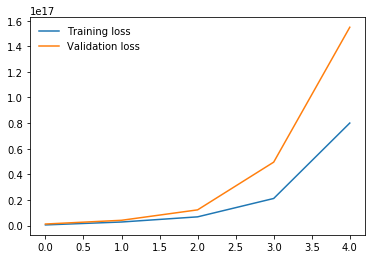

In [131]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)
plt.show()

In [137]:
print('No. of parameters',sum([p.numel()for p in model.parameters()]))

No. of parameters 386718
